<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<h1 align="center">Organization Info</h1> 

* Дедлайн **20 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task6.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

# Home work 1: Basic Artificial Neural Networks

Credit https://github.com/yandexdataschool/YSDA_deeplearning17, https://github.com/DmitryUlyanov


Зачем это всё нужно?! Зачем понимать как работают нейросети внутри когда уже есть куча библиотек?
- Время от времени Ваши сети не учатся, веса становятся nan-ами, все расходится и разваливается -- это можно починить если понимать бекпроп
- Если Вы не понимаете как работают оптимизаторы, то не сможете правильно выставить гиперпарааметры :) и тоже ничего выучить не выйдет
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

The goal of this homework is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design of was heavily inspired by [Torch](http://torch.ch) which is the most convenient neural network environment when the work involves defining new layers. 

This homework requires sending **"multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- hw6_Modules.ipynb

If you want to read more about backprop this links can be helpfull:
- http://udacity.com/course/deep-learning--ud730 
- http://cs231n.stanford.edu/2016/syllabus.html 
- http://www.deeplearningbook.org 

<h1 align="center">Check Questions</h1> 

**Вопрос 1**: Чем нейросети отличаются от линейных моделей, а чем похожи? 

<Ответ>: С точки зрения архитектуры: линейная модель представляет собой нейронную сеть без скрытых слоев. С точки зрения обучения: нейронная сеть, в конечном итоге, решает невыпуклые задачи оптимизации, а линейная модель -- выпуклые.

**Вопрос 2**: В чем недостатки полносвзяных нейронных сетей, какая мотивация к использованию свёрточных?

<Ответ>: Полносвязные нейронные сети не очень хорошо масштабируются для больших изображений. В CIFAR-10 изображения имеют размер 32x32x3 (32, 32, 3 цветовых канала), поэтому один полностью связанный нейрон в первом скрытом слое обычной нейронной сети будет иметь 32 $\cdot$ 32 $\cdot$ 3 = 3072 параметра с весами. Казалось бы, не такое уж и большое число, но становится ясно, почему такая структура не масштабируется для больших изображений. 
Например, изображение более респектабельного размера, например, 200x200x3, приведет к нейронам, которые имеют 200 $\cdot$ 200 $\cdot$ 3 = 120 000 весов. Более того, мы почти наверняка хотели бы иметь несколько таких нейронов, поэтому параметры количество параметров увеличилось бы с огромной скоростью. Очевидно, что полное связывание в данном случае является расточительным, и такое огромное количество параметров быстро приведет к переобучению.

**Вопрос 3**: Какие слои используются в современных нейронных сетях? Опишите как работает каждый слой и свою интуицию зачем он нужен.

    - DenceLayer -- линейное преобразование Wx + b, можно интерпретировать как линейный классификатор (???)
    - Dropout -- это метод регуляризации, целью которого является снижение сложности модели с целью предотвращения переобучения.
    - PoolingLayer -- слой между последовательными уровнями в архитектуре ConvNet. Его функция заключается в постепенном уменьшении пространственного размера представления, чтобы уменьшить количество параметров и вычислений в сети и, следовательно, также предотвратить переобучение.
    - ConvolutionalLayer --  основной строительный блок сверточной сети, который выполняет большую часть вычислительной нагрузки. Интуитивно, сеть будет обучать фильтры, которые активируются, когда они видят какую-то визуальную функцию, такую, например, как пятно некоторого цвета на первом слое и т.д.
    - <Тут Ваш слой>
    
    
**Вопрос 4**: Может ли нейросеть решать задачу регрессии, какой компонент для этого нужно заменить в нейросети из лекции 1?

<Ответ> Конечно, может. Нейросеть будет почти так же, как и проблему классификации, за исключением того, что y будет скаляром, а не вектором, и значения y не ограничены. 
Меня не было на первой лекции по нейронкам.))


**Вопрос 5**: Почему обычные методы оптимизации плохо работают с нейросетями? А какие работают хорошо? Почему они работают хорошо?

<Ответ>: Обычные методы оптимизации плохо работают с нейросетями как правило, из-за того, что очень много параметров в сети и высокая трудоемкость "наивных" вычислений. Если входные данные разрежены, тогда методы, такие как SGD, NAG и momentum работают плохо. Для разреженных наборов данных следует использовать один из самых адаптивных методов обучения (Adam, например).

**Вопрос 6**: Для чего нужен backprop, чем это лучше/хуже чем считать градиенты без него? Почему backprop эффективно считается на GPU?

<Ответ>:  Для однократного честного вычисления значений градиентов функции в точке нужно порядка квадрата от количества операций, нужных для вычисления значения функции ошибки $L$. Backprop метод решает эту проблему, основная идея которого заключается в том, чтобы запомнить некоторые промежуточные значения, которые позволят быстро пересчитать значение градиента в обратном направлении по принципу chain rule.

**Вопрос 7**: Почему для нейросетей не используют кросс валидацию, что вместо неё? Можно ли ее использовать?

<Ответ>: В глубоком обучении обычно стараются  избегать кросс-валидации из-за высокой вычислительной стоимости, связанной с обучением K разных моделей. Вместо того, чтобы выполнять кросс-валидацию, используют случайный выделенный поднабор данных для проверки.

**Вопрос 8**: Небольшой quiz который поможет разобраться со свертками https://www.youtube.com/watch?v=DDRa5ASNdq4 

<img src="img/conv.png" width="600">

<Ответ-Картинка :)>


-------------

Политика списывания. Вы можете обсудить решение с одногрупниками, так интереснее и веселее :) 
Не шарьте друг-другу код, в этом случаи вы ничему не научитесь -- "мыши плакали кололись но продолжали жрать кактус".

Теперь формально. Разница между списыванием и помощью товарища иногда едва различима. Мы искренне надеемся, что при любых сложностях вы можете обратиться к семинаристам и с их подсказками **самостоятельно** справиться с заданием. При зафиксированных случаях списывания (одинаковый код, одинаковые ошибки), баллы за задание будут обнулены всем участникам инцидента.

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Важно 

    - Не забывайте делать GradCheck, чтобы проверить численно что производные правильные, обычно с первого раза не выходит никогда,   пример тут https://goo.gl/pzvzfe
    - Ваш код не должен содержать циклов, все вычисления должны бить векторные, внутри numpy 
    

# Framework

Implement everything in `Modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return AND store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

In [49]:
"""
    --------------------------------------
    -- Tech note
    --------------------------------------
    Inspired by torch I would use
    
    np.multiply, np.add, np.divide, np.subtract instead of *,+,/,-
    for better memory handling
        
    Suppose you allocated a variable    
        
        a = np.zeros(...)
    
    So, instead of
    
        a = b + c  # will be reallocated, GC needed to free
    
    I would go for: 
    
        np.add(b,c,out = a) # puts result in `a`
    
    But it is completely up to you.
"""
%run hw6_Modules.ipynb

Optimizer is implemented for you. 

In [3]:
def sgd_momentum(x, dx, config, state):
    """
        This is a very ugly implementation of sgd with momentum 
        just to show an example how to store old grad in state.
        
        config:
            - momentum
            - learning_rate
        state:
            - old_grad
    """
    
    # x and dx have complex structure, old dx will be stored in a simpler one
    state.setdefault('old_grad', {})
    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            
            cur_x -= cur_old_grad
            i += 1     

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

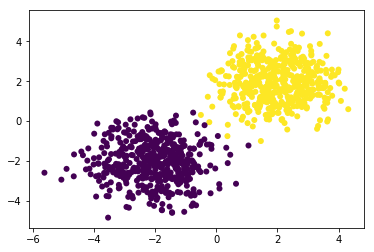

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [19]:
# net = Sequential()
# net.add(Linear(2, 2))
# net.add(SoftMax())

# criterion = ClassNLLCriterion()

# print(net)

# Test something like that then 

net = Sequential()
net.add(Linear(2, 8))
net.add(ReLU())
net.add(Linear(8, 2))
net.add(SoftMax())
criterion = ClassNLLCriterion()
print(net)




Linear 8 -> 2
ReLU
Linear 2 -> 8
SoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [20]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 400

In [21]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

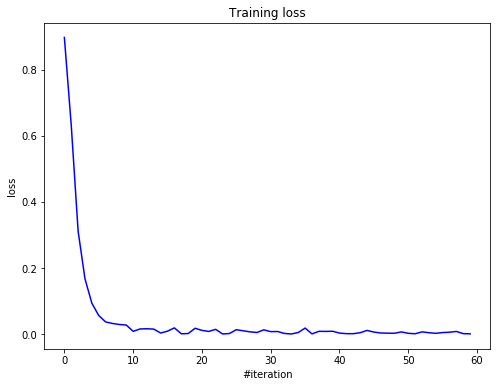

Current loss: 0.000836


In [22]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [ ]:
Current loss: 0.131797


# Digit classification 

We are using [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. Lets start with [cool visualization](http://scs.ryerson.ca/~aharley/vis/). The most beautiful demo is the second one, if you are not familiar with convolutions you can return to it in several lectures. 

In [23]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    X, y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=y)

One-hot encode the labels first.

In [24]:
# Your code goes here. ################################################
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = y.reshape(-1, 1)
y = enc.fit_transform(y).toarray()

- **Compare** `ReLU`, `LeakyRELU` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.

## RELU performance

In [64]:
net = Sequential()
net.add(Linear(784, 200))
net.add(ReLU())
net.add(Linear(200, 10))
net.add(SoftMax())
criterion = ClassNLLCriterion()
print(net)

Linear 200 -> 784
ReLU
Linear 10 -> 200
SoftMax



In [65]:
# Optimizer params
optimizer_config = {'learning_rate' : 2e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 50
batch_size = 300

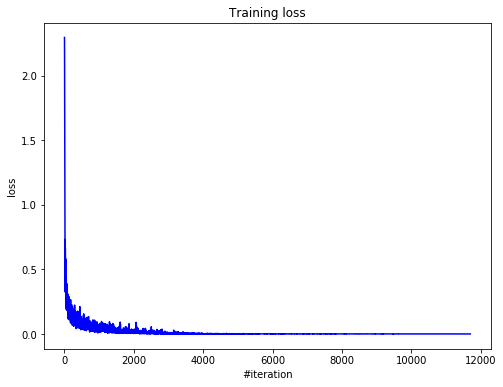

Current loss: 0.000249


In [66]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

## LeakyRELU performance

In [70]:
net = Sequential()
net.add(Linear(784, 200))
net.add(LeakyReLU())
net.add(Linear(200, 10))
net.add(SoftMax())
criterion = ClassNLLCriterion()
print(net)

Linear 200 -> 784
LeakyReLU
Linear 10 -> 200
SoftMax



In [71]:
# Optimizer params
optimizer_config = {'learning_rate' : 2e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 50
batch_size = 300

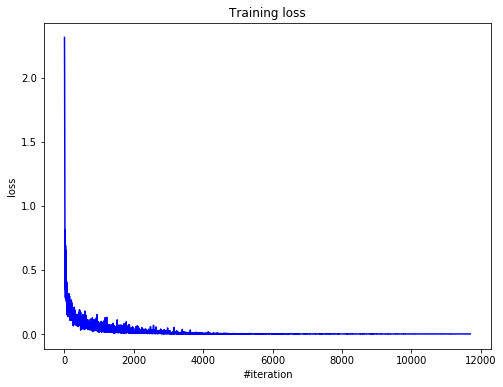

Current loss: 0.000205


In [72]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)  

С данной конструкцией LeakyRELU выдал loss меньше, чем RELU. Но вообще от запуска к запуску не приходилось: с разными learning_rate, batch_size и n_epoch иногда RELU выдавала меньший loss, иногда LeakyRELU.

**Finally**, use all your knowledge to build a super cool model on this dataset, do not forget to split dataset into train and validation. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. 

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [166]:
net = Sequential()
net.add(Linear(784, 1000))
net.add(ReLU())
# net.add(Dropout())
net.add(Linear(1000, 10))
net.add(SoftMax())
criterion = ClassNLLCriterion()
print(net)

Linear 1000 -> 784
ReLU
Linear 10 -> 1000
SoftMax



In [167]:
# Optimizer params
optimizer_config = {'learning_rate' : 2e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 50
batch_size = 300

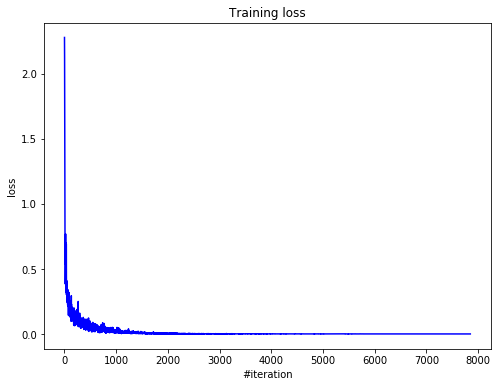

Current loss: 0.000325


In [168]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss) 

In [169]:
# Your code goes here. #################
net.evaluate()
ans = net.forward(X_test)

Print here your accuracy. It should be around 90%.

In [170]:
print('Accuracy: {}'.format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(ans, axis=1))))

Accuracy: 0.9825541125541125


# Bonus Part: Autoencoder 

This part is **OPTIONAL**, you may not do it. It will not be scored, but it is easy and interesting.

Now we are going to build a cool model, named autoencoder. The aim is simple: **encode** the data to a lower dimentional representation. Why? Well, if we can **decode** this representation back to original data with "small" reconstuction loss then we can store only compressed representation saving memory. But the most important thing is -- we can reuse trained autoencoder for classification. 
<img src="img/autoencoder.png">

Picture from this [site](http://multithreaded.stitchfix.com/blog/2015/09/17/deep-style/).

Now implement an autoencoder:

Build it such that dimetionality inside autoencoder changes like that: 

$$784 \text{ (data)} -> 512 -> 256 -> 128 -> 30 -> 128 -> 256 -> 512 -> 784$$

Use **MSECriterion** to score the reconstruction.

You may train it for 9 epochs with batch size = 256, initial lr = 0.1 droping by a factor of 2 every 3 epochs. The reconstruction loss should be about 6.0 and visual quality decent already.
Do not spend time on changing architecture, they are more or less the same. 

In [ ]:
# Your code goes here. ################################################

Some time ago NNs were a lot poorer and people were struggling to learn deep models. To train a classification net people were training autoencoder first (to train autoencoder people were pretraining single layers with [RBM](https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine)), then substituting the decoder part with classification layer (yeah, they were struggling with training autoencoders a lot, and complex techniques were used at that dark times). We are going to this now, fast and easy.  

In [ ]:
# Extract inner representation for train and validation, 
# you should get (n_samples, 30) matrices
# Your code goes here. ################################################

# Now build a logistic regression or small classification net
cnet = Sequential()
cnet.add(Linear(30, 2))
cnet.add(SoftMax())

# Learn the weights
# Your code goes here. ################################################

# Now chop off decoder part
# (you may need to implement `remove` method for Sequential container) 
# Your code goes here. ################################################

# And add learned layers ontop.
autoenc.add(cnet[0])
autoenc.add(cnet[1])

# Now optimize whole model
# Your code goes here. ################################################

* What do you think, does it make sense to build real-world classifiers this way ? Did it work better for you than a straightforward one? Looks like it was not the same ~8 years ago, what has changed beside computational power? 

Run PCA with 30 components on the *train set*, plot original image, autoencoder and PCA reconstructions side by side for 10 samples from *validation set*.
Probably you need to use the following snippet to make aoutpencoder examples look comparible.

In [ ]:
# np.clip(prediction,0,1)
#
# Your code goes here. ################################################